# Benchmarks

In [31]:
import random
import numpy as np
import pandas as pd
import time
import functools

import matplotlib.pyplot as plt

import timeit
from timeit import Timer
import copy
from numba import jit

import warnings
warnings.filterwarnings('ignore')

#### Quadratic sorting algorithms

In [28]:
@jit() 
def numba_insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]

        while j > 0 and A[j-1] > key:
            # Swap
            A[j], A[j-1] = A[j-1], A[j]
            j -= 1

def insertion_sort(A):
    for j in range(1, len(A)):
        key = A[j]

        while j > 0 and A[j-1] > key:
            # Swap
            A[j], A[j-1] = A[j-1], A[j]
            j -= 1


@jit() 
def numba_bubble_sort(A):
    n = len(A)
    has_swapped = True
    num_rounds = 0

    while(has_swapped):
        has_swapped = False

        # Shortens end of list by n - kth iteration - 1
        for i in range(n - num_rounds - 1):

            if A[i] > A[i+1]:
                # Swap
                A[i], A[i+1] = A[i+1], A[i]
                has_swapped = True
        num_rounds += 1

def bubble_sort(A):
    n = len(A)
    has_swapped = True
    num_rounds = 0

    while(has_swapped):
        has_swapped = False

        # Shortens end of list by n - kth iteration - 1
        for i in range(n - num_rounds - 1):

            if A[i] > A[i+1]:
                # Swap
                A[i], A[i+1] = A[i+1], A[i]
                has_swapped = True
        num_rounds += 1

@jit()   
def numba_merge_sort(values): 
  
    if len(values)>1: 
        m = len(values)//2
        left = values[:m] 
        right = values[m:] 
        left = merge_sort(left) 
        right = merge_sort(right) 
  
        values =[] 
  
        while len(left)>0 and len(right)>0: 
            if left[0]<right[0]: 
                values.append(left[0]) 
                left.pop(0) 
            else: 
                values.append(right[0]) 
                right.pop(0) 
  
        for i in left: 
            values.append(i) 
        for i in right: 
            values.append(i) 
                  
    return values   
        
def merge_sort(values): 
  
    if len(values)>1: 
        m = len(values)//2
        left = values[:m] 
        right = values[m:] 
        left = merge_sort(left) 
        right = merge_sort(right) 
  
        values =[] 
  
        while len(left)>0 and len(right)>0: 
            if left[0]<right[0]: 
                values.append(left[0]) 
                left.pop(0) 
            else: 
                values.append(right[0]) 
                right.pop(0) 
  
        for i in left: 
            values.append(i) 
        for i in right: 
            values.append(i) 
                  
    return values

#### Number generator

In [21]:
def random_int_generator(length):
    """Creates list of integers of given length - with random order"""
    return list((np.random.randint(-length, length, size=length)))

def random_float_generator(length):
    """Creates list of decimal numbers of given length - with random order"""
    return list((np.random.uniform(-length, length, size=length)))

def ordered_generator(length):
    """Creates list of numbers of given length - with acsending order"""
    return list(np.arange(1, length))

def reversed_generator(length):
    """Creates list of numbers of given length - with descending order"""
    return list(np.flipud(ordered_generator(length)))

def string_generator(length):
  """Creates list of numbers of given length - with descending order"""

In [22]:
#print(random_int_generator(10))
#print(random_float_generator(10))
#print(ordered_generator(10))
#print(reversed_generator(10))

### Benchmark functions

#### Benchmark function 1 (Yva/ fra oppgavetekst)

In [23]:
def benchmark(algorithm, given_list):
    """ Returns the runtime of a sorting algorithim on a given list."""
    
    rng = np.random.default_rng(12235) 
    clock = timeit.Timer(stmt='sort_func(copy(data))', globals={'sort_func': algorithm,
                                                                'data': given_list , 'copy': copy.copy})
    n_ar, t_ar = clock.autorange()
    t = clock.repeat(repeat=10, number=n_ar)
    return np.average(t)/n_ar

#### Benchmark function 2 (Jon-Mikkel)

In [18]:
def repeating_timer(record, iters=10, *args_, **kwargs_):
    def inner_function(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            print(f"Timing array of {len(kwargs['array'])} elements {iters} times")
            for algorithm in kwargs['function_list']:
                array_copy = copy(kwargs['array'])
                record[algorithm.__name__] = []
                for _ in range(iters):
                    start_time = time.perf_counter()
                    algorithm(array_copy) # Runs algorithm
                    end_time = time.perf_counter()
                    run_time = end_time - start_time
                    record[algorithm.__name__].append(run_time)
                    array_copy = copy(kwargs['array'])
                print("Finished {} in mean {} +-[{}] secs".format(
                    repr(algorithm.__name__), 
                    round(mean(record[algorithm.__name__]), 3),
                    round(stdev(record[algorithm.__name__]), 5)
                ))
        return wrapper
    return inner_function


    
def benchmark_2(
    functions: list, 
    array: list or np.array, 
    iters: int=10
) -> dict:

    record = dict()

    @repeating_timer(record=record, iters=iters)
    def time_algorithms(function_list: list, array: list or np.array):
        for function in function_list:
            function(copy(array))
    
    time_algorithms(function_list=functions, array=array)

    return record

In [24]:
def benchmark_algos_and_types(algorithm, list_size):
    """ Returns the time for given list type and return a dictionary with the results. """
    
    integer_results = [( _ , benchmark(algorithm, random_int_generator(_))) 
                      for _ in range(0, list_size, 50)]
    
    float_results = [( _ , benchmark(algorithm, random_float_generator(_))) 
                     for _ in range(0, list_size, 50)]
    
    ascending_results = [( _ , benchmark(algorithm, ordered_generator(_))) 
                         for _ in range(0, list_size, 50)]
    
    descending_result = [( _ , benchmark(algorithm, reversed_generator(_))) 
                         for _ in range(0, list_size, 50)]
    
    
    all_results = {'Random integers' : integer_results, 
                   'Random float' : float_results, 
                   'Ascending integers' : ascending_results,
                   'Descending integers' : descending_result}
    
    return all_results

### Plotting

In [29]:
def plot_algorithms_benchmark(algorithm, list_size):
    """ Plots the runtime for the different list types. """
    
    results = benchmark_algos_and_types(algorithm, list_size)
    plt.figure()
    for typ in results:
        size, time = zip(*results[typ])
        plt.plot(size, time, label = typ)
        plt.title(algorithm.__name__)
        plt.xlabel('Number of items (n)')
        plt.ylabel('Runtime depending on n')
        plt.legend()

#### Comparing numba insertion sort to normal insertion sort

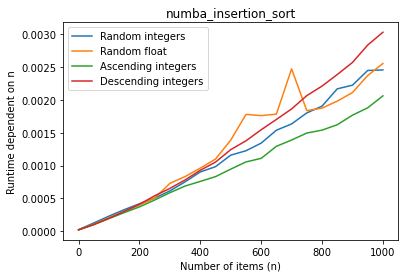

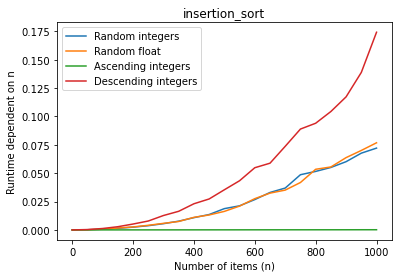

In [32]:
algorithms = [numba_insertion_sort, insertion_sort]

for algo in algorithms:
    plot_algorithms_benchmark(algo, 1001)

#### Plotting how differnt sorting algorithms act on differnt types of lists 

In [ ]:
tic = time.time()

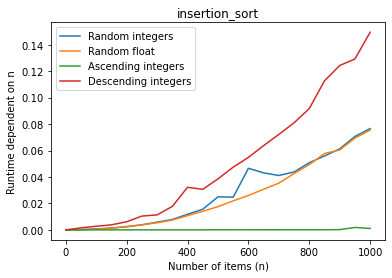

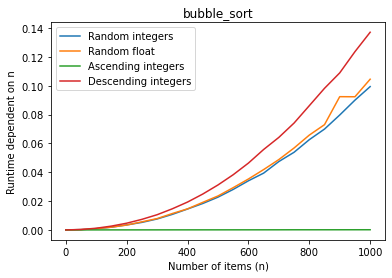

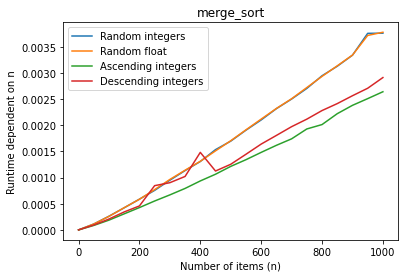

In [16]:
algorithms = [insertion_sort, bubble_sort, merge_sort]

for algo in algorithms:
    plot_algorithms_benchmark(algo, 1001)

In [ ]:
tic = time.time()

In [ ]:
# Trying numba on all functions

algorithms = [insertion_sort, bubble_sort, merge_sort]

for algo in algorithms:
    plot_algorithms_benchmark(algo, 1001)

#### Trying a different benchmark functions

In [ ]:
tic = time.time()

In [ ]:
def benchmark_algos_and_types(algorithm, list_size):
    """ Returns the time for given list type and return a dictionary with the results. """
    
    integer_results = [( _ , benchmark_2(algorithm, random_int_generator(_))) 
                      for _ in range(0, list_size, 50)]
    
    float_results = [( _ , benchmark_2(algorithm, random_float_generator(_))) 
                     for _ in range(0, list_size, 50)]
    
    ascending_results = [( _ , benchmark_2(algorithm, ordered_generator(_))) 
                         for _ in range(0, list_size, 50)]
    
    descending_result = [( _ , benchmark_2(algorithm, reversed_generator(_))) 
                         for _ in range(0, list_size, 50)]
    
    
    all_results = {'Random integers' : integer_results, 
                   'Random float' : float_results, 
                   'Ascending integers' : ascending_results,
                   'Descending integers' : descending_result}
    
    return all_results

In [ ]:
algorithms = [numba_insertion_sort, insertion_sort]

for algo in algorithms:
    plot_algorithms_benchmark(algo, 1001)

In [ ]:
toc = time.time()
print(f"Done in {(toc - tic):.1f} seconds")

#### Comparing quadratic sorting algorithms

In [34]:
def benchmark_quadratic(gen_type, list_size):
    """ Returns the time for given list type and return a dictionary with the results. """
    
    insertion_sort_results = [( _ , benchmark(insertion_sort, gen_type(_))) 
                      for _ in range(0, list_size, 50)]
    
    bubble_sort_results = [( _ , benchmark(bubble_sort, gen_type(_))) 
                     for _ in range(0, list_size, 50)]
     
    all_results = {'Insertion sort' : insertion_sort_results, 
                   'Bubble sort' : bubble_sort_results}
    
    return all_results

In [35]:
def plot_quadratic_benchmark(generator, list_size):
    """ Plots the runtime for the different list types. """
    
    results = benchmark_quadratic(generator, list_size)
    plt.figure()
    for typ in results:
        size, time = zip(*results[typ])
        plt.plot(size, time, label = typ)
        plt.title(generator.__name__)
        plt.xlabel('Number of items (n)')
        plt.ylabel('Runtime depending on n')
        plt.legend()

In [ ]:
gen_types = [random_int_generator, random_float_generator, ordered_generator, ordered_generator]

for generator in gen_types:
    plot_quadratic_benchmark(generator, 501)